In [1]:
import sqlite3 as lite
import os
import sys
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [2]:
# import necessary modules
import write_deployinst_input as wr
import analysis as an

In [3]:
# Write the Cyclus Input File
csv_file = '../database/eu_reactors_pris.csv'

# simulation starts at Jan, 01 , 1950, and for 840 months (70 years)
# first one: reprocessing, second one: once-through
# paths are relative to `scripts` folder
# wr.main(csv_file, sim_start_date, sim_timestep,
#         reactor_template, deployinst_template,
#         reprocessing
#         input_template, output path)

wr.main(csv_file, 19500101, 840,
        '../templates/reactor_template.xml.in',
        '../templates/deployinst_template.xml.in',
        True
        '../templates/input_template.xml.in',
        '../EU_1950_to_2020/eu_reprocessing.xml')


wr.main(csv_file, 19500101, 840,
        '../templates/reactor_template.xml.in',
        '../templates/deployinst_template.xml.in',
        False
        '../templates/input_template.xml.in',
        '../EU_1950_to_2020/eu.xml')

### The input file is created in the folder:

          transition-scenarios/EU_1950_to_2020_reprocess/eu_reprocessing.xml
          transition-scenarios/EU_1950_to_2020_reprocess/eu.xml

###  Run Cyclus on the input file ( This will take ~40 minutes) : 
          
          first: reprocessing
          second: non-reprocessing

In [ ]:
!cyclus -o ./eu_reprocessing.sqlite eu_reprocessing.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [ ]:
!cyclus -o ./eu.sqlite eu.xml

### The output file should be named 
         
          eu_reprocessing.sqlite
          eu.sqlite

# Reprocessing Scenario

In [3]:
# Get Final SNF capacity of Reprocessing
# and stacked bar chart of capacity and number of reactors
# Wait for the complete message to move on
import analysis as an
output = 'eu_reprocessing.sqlite'
con = lite.connect(output)
with con:
    cur = con.cursor()
    print(an.snf(output, cur))
    wr.delete_file('power_plot.png')
    wr.delete_file('number_plot.png')
    an.plot_power(output, cur)
    print('Completed! You may go to the next box')

total snf inventory = 104025750.00026934kg 
U238 = 101324354.14669997kg 
Pu238 = 27576.46477053602kg 
U236 = 558326.3498842036kg 
Pu240 = 226151.071488213kg 
Pu242 = 84140.20690546058kg 
Cm244 = 2356.8225889551904kg 
U235 = 913814.273170203kg 
Np237 = 74674.63868856631kg 
Pu239 = 581511.7971630204kg 
Pu241 = 199465.93405410319kg 
Am241 = 6747.840080674489kg 
Am243 = 19724.03498459715kg 
Cm245 = 6906.419790836207kg 

Completed! You may go to the next box


# Once Through Scenario

In [ ]:
# Get Final SNF capacity of Reprocessing
# and stacked bar chart of capacity and number of reactors
# Wait for the complete message to move on
import analysis as an
output = 'eu.sqlite'
con = lite.connect(output)
with con:
    cur = con.cursor()
    print(an.snf(output, cur))
    wr.delete_file('power_plot.png')
    wr.delete_file('number_plot.png')
    an.plot_power(output, cur)
    print('Completed! You may go to the next box')

# Capacity and Number of Reactors plot (Same for Both)

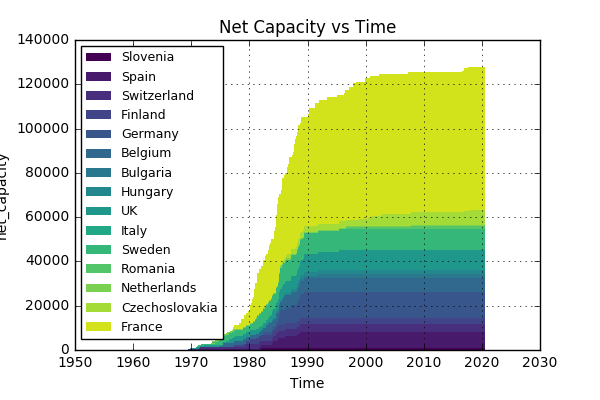

In [4]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

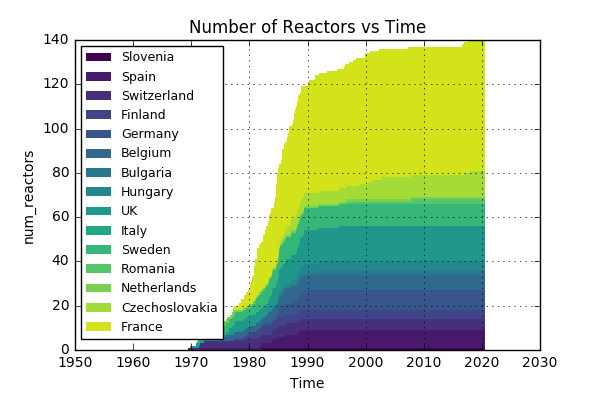

In [5]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')